In [3]:
import numpy as np
import pandas as pd


In [4]:
df = pd.read_csv('Sacramentorealestatetransactions.csv')
df

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768
...,...,...,...,...,...,...,...,...,...,...,...,...
980,9169 GARLINGTON CT,SACRAMENTO,95829,CA,4,3,2280,Residential,Thu May 15 00:00:00 EDT 2008,232425,38.457679,-121.359620
981,6932 RUSKUT WAY,SACRAMENTO,95823,CA,3,2,1477,Residential,Thu May 15 00:00:00 EDT 2008,234000,38.499893,-121.458890
982,7933 DAFFODIL WAY,CITRUS HEIGHTS,95610,CA,3,2,1216,Residential,Thu May 15 00:00:00 EDT 2008,235000,38.708824,-121.256803
983,8304 RED FOX WAY,ELK GROVE,95758,CA,4,2,1685,Residential,Thu May 15 00:00:00 EDT 2008,235301,38.417000,-121.397424


                                 street state  beds  baths  sq__ft  \
City       Zipcode                                                   
SACRAMENTO 95838           3526 HIGH ST    CA     2      1     836   
           95823            51 OMAHA CT    CA     3      1    1167   
           95815         2796 BRANCH ST    CA     2      1     796   
           95815       2805 JANETTE WAY    CA     2      1     852   
           95824        6001 MCMAHON DR    CA     2      1     797   
           95841     5828 PEPPERMILL CT    CA     3      1    1122   
           95842    6048 OGDEN NASH WAY    CA     3      2    1104   
           95820          2561 19TH AVE    CA     3      1    1177   

                           type                     sale_date  price  \
City       Zipcode                                                     
SACRAMENTO 95838    Residential  Wed May 21 00:00:00 EDT 2008  59222   
           95823    Residential  Wed May 21 00:00:00 EDT 2008  68212   
           

<Axes: xlabel='City,Zipcode'>

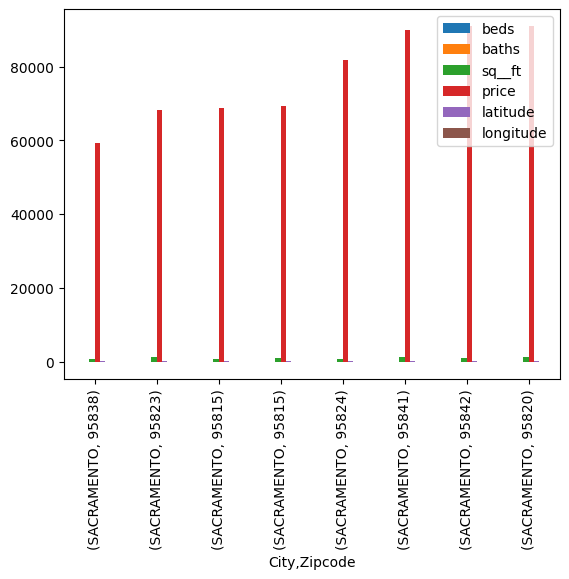

In [5]:
df.set_index(['city', 'zip'], inplace=True)

df.index.names = ['City', 'Zipcode']

print(df.head(8))

df[:8].plot(kind='bar')

In [6]:
stacked = df.stack()

print(stacked.head(8))

df = df.loc[~df.index.duplicated(keep='first')]

unstacked = df.unstack()

print(unstacked.head(8))

City        Zipcode           
SACRAMENTO  95838    street                       3526 HIGH ST
                     state                                  CA
                     beds                                    2
                     baths                                   1
                     sq__ft                                836
                     type                          Residential
                     sale_date    Wed May 21 00:00:00 EDT 2008
                     price                               59222
dtype: object
                       street                                          \
Zipcode                 95603              95608                95610   
City                                                                    
ANTELOPE                  NaN                NaN                  NaN   
AUBURN           1740 HIGH ST                NaN                  NaN   
CAMERON PARK              NaN                NaN                  NaN   
CARMICHAEL   

In [7]:
df2 = df[['state', 'street', 'beds', 'baths', 'sale_date']].set_index(['state', 'street'])

df2.index.names = ['State', 'Street']

print(df2.head(8))
df2.index.names = ['City', 'Zipcode']

print(df2.head(8))
df2.index.names = ['City', 'Zipcode']

print(df2.head(8))

                                       beds  baths  \
State Street                                         
CA    3526 HIGH ST                        2      1   
      51 OMAHA CT                         3      1   
      2796 BRANCH ST                      2      1   
      6001 MCMAHON DR                     2      1   
      5828 PEPPERMILL CT                  3      1   
      6048 OGDEN NASH WAY                 3      2   
      2561 19TH AVE                       3      1   
      11150 TRINITY RIVER DR Unit 114     2      2   

                                                          sale_date  
State Street                                                         
CA    3526 HIGH ST                     Wed May 21 00:00:00 EDT 2008  
      51 OMAHA CT                      Wed May 21 00:00:00 EDT 2008  
      2796 BRANCH ST                   Wed May 21 00:00:00 EDT 2008  
      6001 MCMAHON DR                  Wed May 21 00:00:00 EDT 2008  
      5828 PEPPERMILL CT               

In [8]:
df3 = df2.copy()

df2_reset = df2.reset_index()
df3_reset = df3.reset_index()

merged_df = pd.merge(df2_reset, df3_reset, on=['City', 'Zipcode'])

merged_df.set_index(['City', 'Zipcode'], inplace=True)

print(merged_df.head())

                         beds_x  baths_x                   sale_date_x  \
City Zipcode                                                             
CA   3526 HIGH ST             2        1  Wed May 21 00:00:00 EDT 2008   
     51 OMAHA CT              3        1  Wed May 21 00:00:00 EDT 2008   
     2796 BRANCH ST           2        1  Wed May 21 00:00:00 EDT 2008   
     6001 MCMAHON DR          2        1  Wed May 21 00:00:00 EDT 2008   
     5828 PEPPERMILL CT       3        1  Wed May 21 00:00:00 EDT 2008   

                         beds_y  baths_y                   sale_date_y  
City Zipcode                                                            
CA   3526 HIGH ST             2        1  Wed May 21 00:00:00 EDT 2008  
     51 OMAHA CT              3        1  Wed May 21 00:00:00 EDT 2008  
     2796 BRANCH ST           2        1  Wed May 21 00:00:00 EDT 2008  
     6001 MCMAHON DR          2        1  Wed May 21 00:00:00 EDT 2008  
     5828 PEPPERMILL CT       3        1  W

In [9]:
data = pd.read_csv("credit-data-non-null.csv")
data.head()

,serious_dlqin2yrs,revolving_utilization_of_unsecured_lines,age,number_of_time30-59_days_past_due_not_worse,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [10]:
#Write a custom function called cap_value(x, cap) that will set x to the cap if x > cap.
#Then apply it to debt_ratio with a cap of 5

data = pd.read_csv("credit-data-non-null.csv")

def cap_value(x, cap):
    if x > cap:
        return cap
    else:
        return x
    
data['debt_ratio'] = data['debt_ratio'].apply(lambda x: cap_value(x, 5))

In [11]:
#Use groupby to calculate the percent of customers that went bad for each age

age_bad_percent = data.groupby('age')['serious_dlqin2yrs'].mean() * 100

In [12]:
#Add a new column age_group for the dataframe. Divide the age into groups of every 10
#years in ascending order, then rearrange the data to match the age_group categorization.
##Display the first eight rows of data. Do some plotting to reflect it. Use age_group for
#data aggregation on revolving_utilization_of_unsecured_lines and monthly_income.
#Display the result.

data['age_group'] = pd.cut(data['age'], bins=range(0, 110, 10), right=False)


print(data.head(8))


   serious_dlqin2yrs  revolving_utilization_of_unsecured_lines  age  \
0                  1                                  0.766127   45   
1                  0                                  0.957151   40   
2                  0                                  0.658180   38   
3                  0                                  0.233810   30   
4                  0                                  0.907239   49   
5                  0                                  0.213179   74   
6                  0                                  0.754464   39   
7                  0                                  0.189169   57   

   number_of_time30-59_days_past_due_not_worse  debt_ratio  monthly_income  \
0                                            2    0.802982          9120.0   
1                                            0    0.121876          2600.0   
2                                            1    0.085113          3042.0   
3                                            0  

          revolving_utilization_of_unsecured_lines                       \
                                              mean  count      max  min   
age_group                                                                 
[0, 10)                                   1.000000      1      1.0  1.0   
[10, 20)                                       NaN      0      NaN  NaN   
[20, 30)                                  4.380330   8820   8497.0  0.0   
[30, 40)                                  9.198001  23183  22198.0  0.0   
[40, 50)                                  7.488347  34377  20514.0  0.0   
[50, 60)                                  6.489113  35301  50708.0  0.0   
[60, 70)                                  3.748979  28905  11553.0  0.0   
[70, 80)                                  3.893524  13601   8831.0  0.0   
[80, 90)                                  1.460974   5125   2050.0  0.0   
[90, 100)                                 0.125559    674      1.0  0.0   

          monthly_income

C:\Users\krish\AppData\Local\Temp\ipykernel_7732\3201274028.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('age_group')['serious_dlqin2yrs'].mean().plot(kind='bar', title='Percentage of customers going bad by age group')
C:\Users\krish\AppData\Local\Temp\ipykernel_7732\3201274028.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aggregated_data = data.groupby('age_group')[['revolving_utilization_of_unsecured_lines', 'monthly_income']].agg(['mean', 'count', 'max', 'min'])


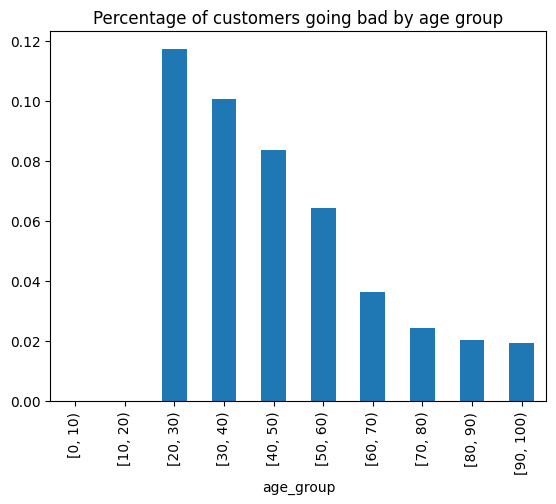

In [13]:
data.groupby('age_group')['serious_dlqin2yrs'].mean().plot(kind='bar', title='Percentage of customers going bad by age group')


aggregated_data = data.groupby('age_group')[['revolving_utilization_of_unsecured_lines', 'monthly_income']].agg(['mean', 'count', 'max', 'min'])


print(aggregated_data)

   number_real_estate_loans_or_lines  serious_dlqin2yrs  \
0                                  0                  0   
1                                  0                  1   
2                                  1                  0   
3                                  1                  1   
4                                  2                  0   
5                                  2                  1   
6                                  3                  0   
7                                  3                  1   

   revolving_utilization_of_unsecured_lines    age  \
0                                     51516  51516   
1                                      4672   4672   
2                                     49590  49590   
3                                      2748   2748   
4                                     29757  29757   
5                                      1765   1765   
6                                      5878   5878   
7                                   

<Axes: title={'center': 'Count of customers by number of real estate loans'}, xlabel='number_real_estate_loans_or_lines'>

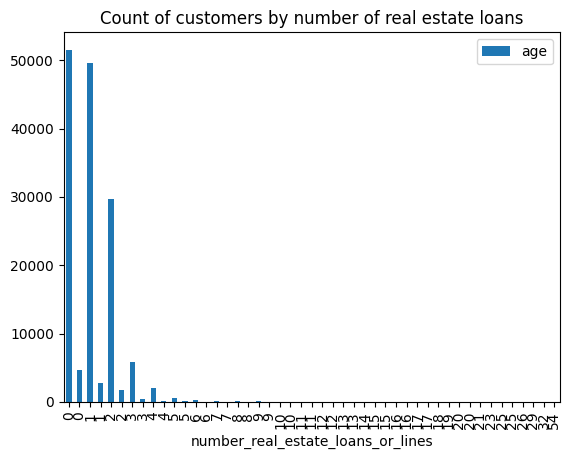

In [14]:
#Regroup data using number_real_estate_loans_or_lines and serious_dlqin2yrs, display
#the first eight rows of data and do some plotting to reflect this it. Then do count, mean,
#max, min on revolving_utilization_of_unsecured_lines and monthly_income. Display the
#result. Then select the top five monthly_income values by group and display it.

grouped_data = data.groupby(['number_real_estate_loans_or_lines', 'serious_dlqin2yrs']).count().reset_index()

# Display the first eight rows of data
print(grouped_data.head(8))

# Plotting
grouped_data.plot(x='number_real_estate_loans_or_lines', y='age', kind='bar', title='Count of customers by number of real estate loans')



In [15]:
# Aggregation on revolving_utilization_of_unsecured_lines and monthly_income
aggregated_data2 = data.groupby('number_real_estate_loans_or_lines')[['revolving_utilization_of_unsecured_lines', 'monthly_income']].agg(['count', 'mean', 'max', 'min'])

# Display the result
print(aggregated_data2)



                                  revolving_utilization_of_unsecured_lines  \
                                                                     count   
number_real_estate_loans_or_lines                                            
0                                                                    56188   
1                                                                    52338   
2                                                                    31522   
3                                                                     6300   
4                                                                     2170   
5                                                                      689   
6                                                                      320   
7                                                                      171   
8                                                                       93   
9                                                               

In [16]:
# Select the top five monthly_income values by group
top_five_income_values = data.groupby('number_real_estate_loans_or_lines')['monthly_income'].nlargest(5)

# Display the result
print(top_five_income_values)


number_real_estate_loans_or_lines        
0                                  98255     835040.0
                                   95524     649587.0
                                   29587     629000.0
                                   28704     582369.0
                                   110145    562466.0
                                               ...   
25                                 55246      12400.0
26                                 14599      48000.0
29                                 52675      55966.0
32                                 83583      70000.0
54                                 24461       8000.0
Name: monthly_income, Length: 104, dtype: float64
